In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.decomposition import PCA
#import mpld3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.externals import joblib
from sklearn import metrics
from sklearn import manifold
import os  # for os.path.basename
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.manifold import TSNE
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
from scipy.cluster.hierarchy import ward, dendrogram
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))
from sklearn.manifold import MDS
from sklearn.decomposition import TruncatedSVD
import numpy as np
from pylab import *
from sklearn.utils.extmath import randomized_svd
from scipy.spatial.distance import cosine
from sklearn.decomposition import NMF
from sklearn import preprocessing
dirname = '/home/clau/Documents/journal_five_countries/'

NMF Transform

In [2]:
category = 'all'
country = 'ireland'
usage_matrix = pd.read_csv(dirname+category+'_vectors_'+country+'.csv', header=None)

In [96]:
nmf_model = NMF(n_components=5, max_iter=200)
W = nmf_model.fit_transform(usage_matrix)
H = nmf_model.components_

In [97]:
W

array([[ 0.064846  ,  0.        ,  0.0169134 ,  0.29694404,  0.        ],
       [ 0.        ,  0.        ,  0.35934304,  0.        ,  0.        ],
       [ 0.06897376,  0.        ,  0.04388903,  0.24972193,  0.01287142],
       ..., 
       [ 0.24096718,  0.        ,  0.        ,  0.0079816 ,  0.        ],
       [ 0.03561824,  0.2794607 ,  0.        ,  0.        ,  0.        ],
       [ 0.16274104,  0.06609259,  0.04836304,  0.        ,  0.        ]])

In [98]:
W.shape

(644, 5)

In [99]:
H

array([[ 0.07198225,  4.07179897,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.01732304,  0.        ,  0.        ,  0.        ,  3.0587369 ,
         0.        ],
       [ 0.05277406,  0.        ,  0.        ,  0.        ,  0.        ,
         2.78185516],
       [ 0.03418777,  0.        ,  2.28713603,  0.        ,  0.        ,
         0.        ],
       [ 0.22896405,  0.        ,  0.        ,  1.74689849,  0.        ,
         0.        ]])

In [100]:
H.shape

(5, 6)

In [105]:
num_clusters = 2

audience = codecs.open(dirname+category+'_audience_'+country+'.csv', 'r')
audience_names = []
for a in audience:
    audience_names.append(a.strip())
audience.close()

km = KMeans(n_clusters=num_clusters)

results = km.fit(W)

clusters = km.labels_.tolist()

readers = {'title': audience_names, 'cluster': clusters}

frame = pd.DataFrame(readers, index=[clusters], columns=['title', 'cluster'])

frame['cluster'].value_counts()

sc = metrics.silhouette_score(usage_matrix, km.labels_, metric='euclidean')
#purity = metrics.pairwise_distances(tfidf_matrix, km.labels_)

print(sc)
print("-------------------------")



0.487243708294
-------------------------


In [54]:
joblib.dump(km,  dirname+category+'_cluster_'+country+'.pkl')

km = joblib.load(dirname+category+'_cluster_'+country+'.pkl')

#grouped = frame['rank'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

#grouped.mean() #average rank (1 to 100) per cluster

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#00bfff'}#, 5: '#771b9e'}#, 6: '#66a61e', 7: '#d9db91'}#, 8: '#EA2E49'}#, 9: '#2BBFBD', 10: '#F29B30'}


#set up cluster names using a dict
cluster_names = {0: 'c1', 1: 'c2', 2: 'c3', 3: 'c4', 4: 'c5'}#, 5: 'c6'}#, 6: 'c7', 7: 'c8'}#, 8: 'c9'}#, 9:'c10', 10:'c11'}
                 # 9: 'c10'}

#cluster_markers = {0: 'o', 1: 'D', 2: '^', 3: 's', 4: '*'}
cluster_markers = {0: 'o', 1: 'o', 2: 'o', 3: 'o', 4: 'o'}#, 5:'o'}#, 6:'o', 7:'o'}#, 8:'o'}#, 9:'o', 10:'o'}




0
     label       title          x         y
7        0   188343593   8.948013 -2.370138
8        0  4881054129  26.055918 -3.519676
9        0   562681154  26.055918 -3.519676
11       0  3346656581   8.901820 -2.295903
12       0   120534459  26.055917 -3.519676
29       0  3404216499   5.941909 -3.140830
30       0    87239414  26.055917 -3.519676
43       0   357771971  26.055917 -3.519676
50       0    39477107   7.773748 -4.303785
52       0  2894370797  26.055917 -3.519676
65       0   104151444   5.802417 -3.121349
70       0  3407360319   6.664544 -5.054740
77       0    24960465   8.421377 -2.499468
83       0  2555855042  26.055930 -3.519674
84       0  1948967970  26.055917 -3.519676
87       0   521741894   0.667870 -9.385736
94       0   314048832   7.023958 -4.474794
95       0   815242218  26.055917 -3.519676
96       0  4858672288   7.628673 -4.536321
103      0   826880478  10.193971 -1.827811
105      0   275682630   6.588412 -5.093769
123      0   224544231   6.1

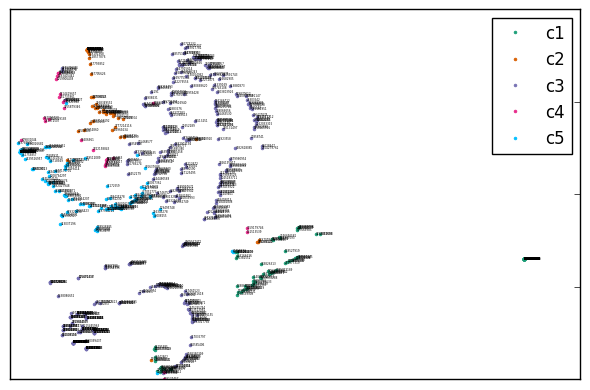

In [55]:
dist = 1 - cosine_similarity(usage_matrix)
X_tsne = TSNE(learning_rate=100).fit_transform(dist)
xs2, ys2 = X_tsne[:, 0], X_tsne[:, 1]
print()
print()
#create data frame that has the result of the MDS plus the cluster numbers and titles
df2 = pd.DataFrame(dict(x=xs2, y=ys2, label=clusters, title=audience_names))

#group by cluster
groups2 = df2.groupby('label')


# set up plot
fig2, ax2 = plt.subplots() # set size
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name2, group2 in groups2:
    print(name2)
    print(group2)
    ax2.plot(group2.x, group2.y, marker=cluster_markers[name2], linestyle='', ms=2,
            label=cluster_names[name2], color=cluster_colors[name2],
            mec=cluster_colors[name2])
    ax2.set_aspect('auto')
    ax2.tick_params(
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax2.tick_params(
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax2.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the journalist_id
for i in range(len(df2)):
    ax2.text(df2.ix[i]['x'], df2.ix[i]['y'], df2.ix[i]['title'], size=2)


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

#fig, ax = plt.subplots(figsize=(15, 20)) # set size
#ax1 = dendrogram(linkage_matrix, orientation="right")#, labels=journalists_names)

plt.tick_params(
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('/home/clau/Documents/journal_five_countries/'+category+'_cluster_'+country+'.png', dpi=300) #save figure as ward_clusters

plt.show() #show the plot
#plt.set_canvas(plt.gcf().canvas)
#plt.savefig('/home/clau/Documents/journal_five_countries/business_cluster.pdf', format='pdf')